In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# cheking for duplicates
df.duplicated().sum()

np.int64(0)

In [3]:
# Dropping customerID column, it not be useful in predicting churn
df.drop("customerID",axis=1,inplace=True)

In [7]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


C:\Users\vmohm\AppData\Local\Temp\ipykernel_5668\2295961358.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


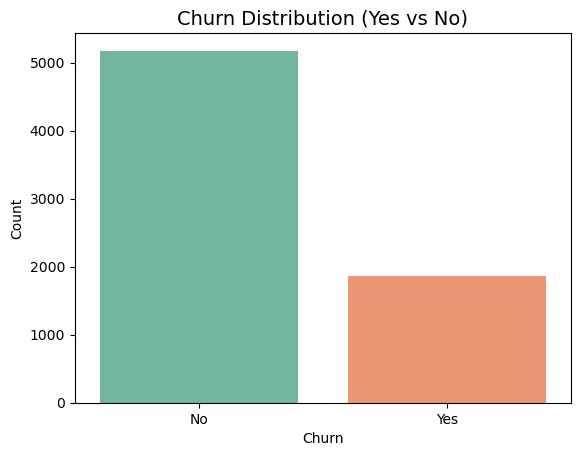

In [8]:
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution (Yes vs No)", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

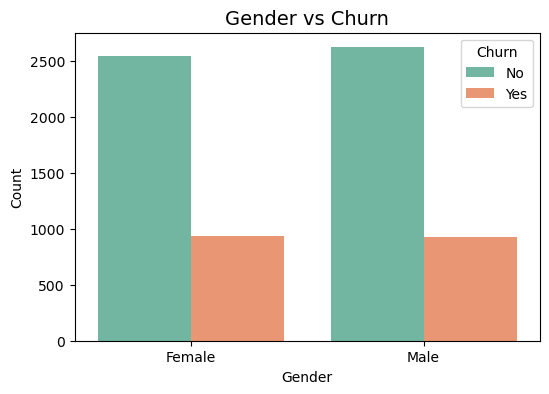

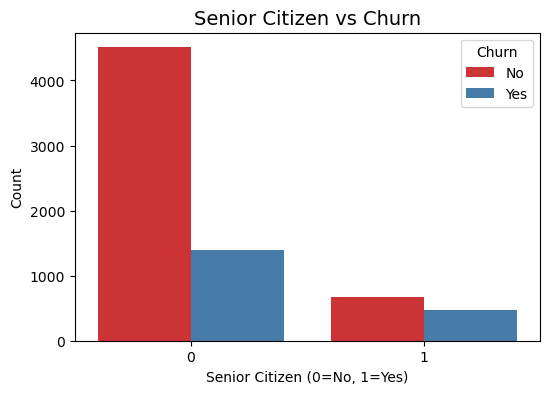

In [9]:
# Gender vs Churn (Countplot)
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="Churn", data=df, palette="Set2")
plt.title("Gender vs Churn", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# SeniorCitizen vs Churn (Barplot)
plt.figure(figsize=(6,4))
sns.countplot(x="SeniorCitizen", hue="Churn", data=df, palette="Set1")
plt.title("Senior Citizen vs Churn", fontsize=14)
plt.xlabel("Senior Citizen (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

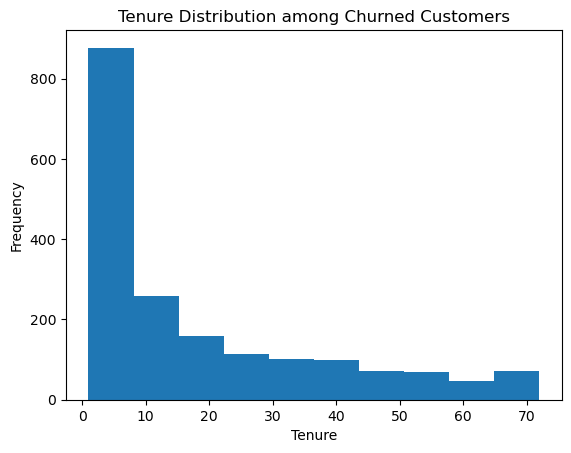

In [10]:
df1=df[df['Churn'] == "Yes"]
df1['tenure'].plot(kind='hist')
plt.xlabel("Tenure")
plt.title("Tenure Distribution among Churned Customers")
plt.show()

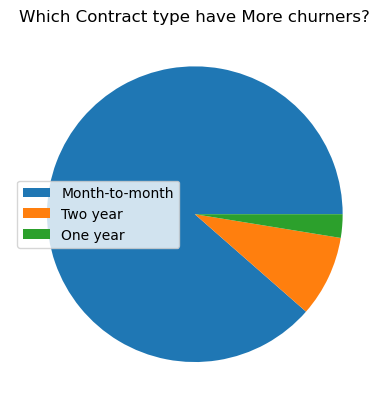

In [11]:
plt.pie(df1['Contract'].value_counts())
plt.legend(df1['Contract'].unique())
plt.title("Which Contract type have More churners?") 
plt.show()

C:\Users\vmohm\AppData\Local\Temp\ipykernel_5668\3219697885.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set3")


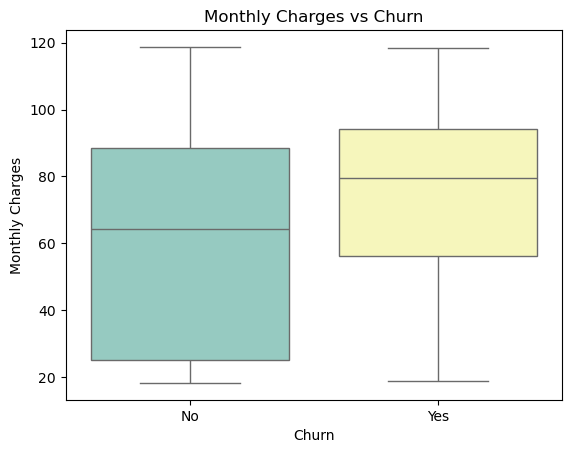

In [12]:
# Boxplot: MonthlyCharges vs Churn

sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set3")
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


Feature Engineering

In [7]:
result = df.isin([" "])
locations = result[result].stack().index.tolist()
print(locations) 

[(488, 'TotalCharges'), (753, 'TotalCharges'), (936, 'TotalCharges'), (1082, 'TotalCharges'), (1340, 'TotalCharges'), (3331, 'TotalCharges'), (3826, 'TotalCharges'), (4380, 'TotalCharges'), (5218, 'TotalCharges'), (6670, 'TotalCharges'), (6754, 'TotalCharges')]


In [8]:
# removing the rows with totalcharges have empty values
df = df[df["TotalCharges"] != " "]
df["TotalCharges"] = df["TotalCharges"].astype(float)

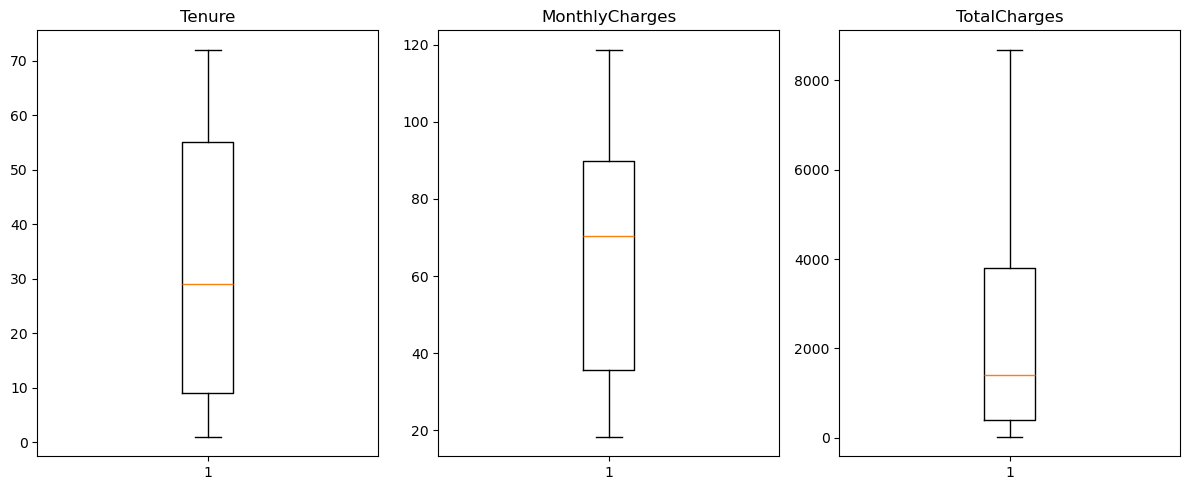

In [9]:
# Checking for outliers

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Boxplots
axes[0].boxplot(df['tenure'])
axes[0].set_title("Tenure")

axes[1].boxplot(df['MonthlyCharges'])
axes[1].set_title("MonthlyCharges")

axes[2].boxplot(df['TotalCharges'])
axes[2].set_title("TotalCharges")

plt.tight_layout()
plt.show()

In [10]:
# Repalcing The yes with 1 and No with 0
df = df.replace("Yes",1)
df = df.replace("No",0)
df = df.replace("No phone service",2)
df = df.replace("No internet service",2) # replacing No internet service with 2 because it present in other columns

C:\Users\vmohm\AppData\Local\Temp\ipykernel_4848\2693406171.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("No",0)
C:\Users\vmohm\AppData\Local\Temp\ipykernel_4848\2693406171.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("No phone service",2)
C:\Users\vmohm\AppData\Local\Temp\ipykernel_4848\2693406171.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. 

In [11]:
#onehot encoding remaining features
df = pd.get_dummies(df, columns=["gender", "PaymentMethod", 
                                 "Contract", "InternetService"
                                 ],
                    drop_first=True)

In [12]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic
0,0,1,0,1,0,2,0,1,0,0,...,29.85,0,False,False,True,False,False,False,True,False
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,0,True,False,False,True,True,False,True,False
2,0,0,0,2,1,0,1,1,0,0,...,108.15,1,True,False,False,True,False,False,True,False
3,0,0,0,45,0,2,1,0,1,1,...,1840.75,0,True,False,False,False,True,False,True,False
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,1990.50,0,True,False,False,True,True,False,True,False
7039,0,1,1,72,1,1,0,1,1,0,...,7362.90,0,False,True,False,False,True,False,False,True
7040,0,1,1,11,0,2,1,0,0,0,...,346.45,0,False,False,True,False,False,False,True,False
7041,1,1,0,4,1,1,0,0,0,0,...,306.60,1,True,False,False,True,False,False,False,True


In [13]:
df = df.astype(float)

In [14]:
#Cheching Whether all features are numerical or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   float64
 1   Partner                                7032 non-null   float64
 2   Dependents                             7032 non-null   float64
 3   tenure                                 7032 non-null   float64
 4   PhoneService                           7032 non-null   float64
 5   MultipleLines                          7032 non-null   float64
 6   OnlineSecurity                         7032 non-null   float64
 7   OnlineBackup                           7032 non-null   float64
 8   DeviceProtection                       7032 non-null   float64
 9   TechSupport                            7032 non-null   float64
 10  StreamingTV                            7032 non-null   float64
 11  Streaming

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features and Target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest Model
model = RandomForestClassifier(
    n_estimators=500,        # number of trees
    max_depth=10,            # limit tree depth
    class_weight="balanced", # handle imbalance
    random_state=42
)

model.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7711442786069652

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.79      0.83      1033
         1.0       0.55      0.73      0.63       374

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.77      0.78      1407


Confusion Matrix:
 [[813 220]
 [102 272]]


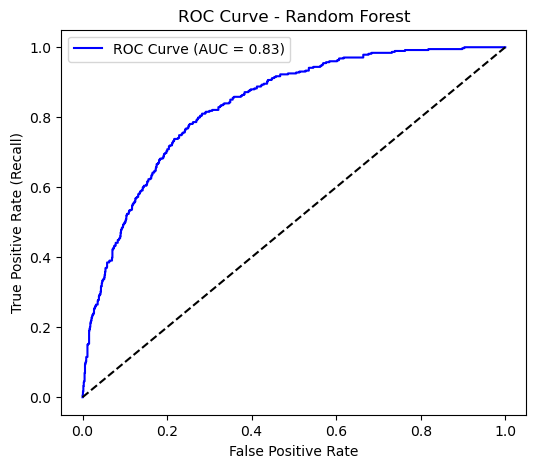

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:,1]

# ---------------------------
# ROC Curve
# ---------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],"k--")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()




In [14]:
import joblib

# Save model
joblib.dump(model, "churn_model.pkl")

['churn_model.pkl']

In [8]:
import os
print(os.getcwd())


C:\Users\vmohm\Main_ML_Projects


In [9]:
%ls

 Volume in drive C is OS
 Volume Serial Number is D630-9A3F

 Directory of C:\Users\vmohm\Main_ML_Projects

27-08-2025  15:10    <DIR>          .
27-08-2025  11:09    <DIR>          ..
27-08-2025  06:23               191 .dockerignore
27-08-2025  06:25    <DIR>          .ipynb_checkpoints
27-08-2025  11:42             1,350 app.py
26-08-2025  10:20        12,000,557 churn_model.pkl
27-08-2025  11:44               327 Dockerfile
27-08-2025  11:20                 0 gcloud
25-08-2025  12:22    <DIR>          mlruns
26-08-2025  15:42                37 requirements.txt
25-08-2025  09:52           977,501 Telco-Customer-Churn.csv
27-08-2025  15:10           273,064 Untitled1.ipynb
               8 File(s)     13,253,027 bytes
               4 Dir(s)  361,748,512,768 bytes free


In [6]:
# Response after Dockerization
import requests

url = "http://127.0.0.1:8000/predict"

data = {
    "SeniorCitizen": 0,
    "Partner": 1,
    "Dependents": 0,
    "tenure": 14,
    "PhoneService": 1,
    "MultipleLines": 0,
    "OnlineSecurity": 0,
    "OnlineBackup": 1,
    "DeviceProtection": 1,
    "TechSupport": 0,
    "StreamingTV": 1,
    "StreamingMovies": 0,
    "PaperlessBilling": 1,
    "MonthlyCharges": 70.5,
    "TotalCharges": 845.5,
    "gender_Male": 1,
    "PaymentMethod_Credit card (automatic)": 1,
    "PaymentMethod_Electronic check": 0,
    "PaymentMethod_Mailed check": 0,
    "Contract_One year": 1,
    "Contract_Two year": 0,
    "InternetService_DSL": 0,
    "InternetService_Fiber optic": 1
}

response = requests.post(url, json=data)
print(response.json())




{'churn_prediction': 0, 'churn_probability': 0.4}


In [7]:
#Response After deploying model in cloud using public accesscible url-"https://churn-api-280458955308.us-central1.run.app/predict"
import requests

url = "https://churn-api-280458955308.us-central1.run.app/predict"
data = {"age": 30, "subscriptiontype": "Premium", "tenure": 12}

response = requests.post(url, json=data)
print(response.json())

{'churn_prediction': 1, 'churn_probability': 0.56}
